<a href="https://colab.research.google.com/github/wx-chevalier/AIDL-Workbench/blob/master/datasets/mnist/fashion_mnist.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Fashion Mnist

[Fashion Mnist](https://github.com/zalandoresearch/fashion-mnist)

In [1]:
from google.colab import drive
drive.mount("/content/drive")

print('Files in Drive:')
!ls /content/drive/'My Drive'

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).
Files in Drive:
'Colab Notebooks'   Data   Web


# Download Data

In [6]:
# Download Fashion Mnist
# ensure the target dir
!mkdir -p /content/drive/'My Drive'/Data/fashion_mnist

!wget -O /content/drive/'My Drive'/Data/fashion_mnist/train-images-idx3-ubyte.gz http://fashion-mnist.s3-website.eu-central-1.amazonaws.com/train-images-idx3-ubyte.gz

--2019-06-12 07:55:10--  http://fashion-mnist.s3-website.eu-central-1.amazonaws.com/train-images-idx3-ubyte.gz
Resolving fashion-mnist.s3-website.eu-central-1.amazonaws.com (fashion-mnist.s3-website.eu-central-1.amazonaws.com)... 52.219.74.150
Connecting to fashion-mnist.s3-website.eu-central-1.amazonaws.com (fashion-mnist.s3-website.eu-central-1.amazonaws.com)|52.219.74.150|:80... connected.
HTTP request sent, awaiting response... 200 OK
Length: 26421880 (25M) [binary/octet-stream]
Saving to: ‘/content/drive/My Drive/Data/fashion_mnist/train-images-idx3-ubyte.gz’

/content/drive/My D 100%[===================>]  25.20M  14.1MB/s    in 1.8s    

2019-06-12 07:55:12 (14.1 MB/s) - ‘/content/drive/My Drive/Data/fashion_mnist/train-images-idx3-ubyte.gz’ saved [26421880/26421880]



# Playground

## TensorFlow


In [11]:
from tensorflow.examples.tutorials.mnist import input_data

data = input_data.read_data_sets('data/fashion_mnist')

BATCH_SIZE = 100
data.train.next_batch(BATCH_SIZE)

Extracting data/fashion_mnist/train-images-idx3-ubyte.gz
Extracting data/fashion_mnist/train-labels-idx1-ubyte.gz
Extracting data/fashion_mnist/t10k-images-idx3-ubyte.gz
Extracting data/fashion_mnist/t10k-labels-idx1-ubyte.gz


(array([[0., 0., 0., ..., 0., 0., 0.],
        [0., 0., 0., ..., 0., 0., 0.],
        [0., 0., 0., ..., 0., 0., 0.],
        ...,
        [0., 0., 0., ..., 0., 0., 0.],
        [0., 0., 0., ..., 0., 0., 0.],
        [0., 0., 0., ..., 0., 0., 0.]], dtype=float32),
 array([1, 6, 5, 9, 4, 5, 4, 7, 1, 5, 6, 1, 0, 5, 6, 4, 9, 4, 5, 5, 6, 3,
        2, 9, 4, 9, 2, 4, 6, 9, 0, 0, 2, 5, 3, 5, 9, 2, 1, 0, 9, 8, 9, 3,
        3, 0, 0, 1, 3, 6, 9, 3, 3, 7, 6, 5, 7, 6, 1, 1, 3, 4, 4, 3, 4, 0,
        9, 1, 3, 4, 0, 9, 7, 1, 5, 7, 3, 4, 7, 0, 4, 0, 5, 9, 4, 6, 7, 4,
        6, 0, 8, 2, 1, 8, 1, 5, 5, 2, 1, 1], dtype=uint8))

## Keras

In [16]:
import tensorflow as tf 
from tensorflow import keras
from keras.models import Sequential
from keras.layers import Dense
import numpy as np 
import matplotlib.pyplot as plt 

print (tf.__version__) # 1.12.0

1.13.1


train_images: (60000, 28, 28)
test_images: (10000, 28, 28)


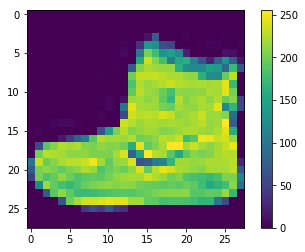

In [20]:
# Loading the fashion MNIST data
fashion_mnist = keras.datasets.fashion_mnist
(train_images, train_labels), (test_images, test_labels) = fashion_mnist.load_data() 
# class names are not included, need to create them to plot the images  
class_names = ['T-shirt/top', 'Trouser', 'Pullover', 'Dress', 'Coat', 'Sandal', 'Shirt', 'Sneaker', 'Bag', 'Ankle boot']

print("train_images:", train_images.shape)
print("test_images:", test_images.shape)
  
# Visualize the first image from the training dataset
plt.figure()
plt.imshow(train_images[0])
plt.colorbar()
plt.grid(False)

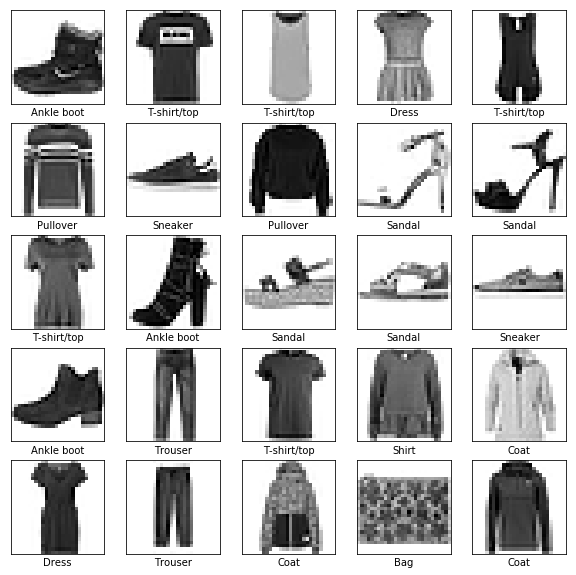

In [21]:
# Normalizing the data

# scale the values to a range of 0 to 1 of both data sets
train_images = train_images / 255.0
test_images = test_images / 255.0

# display the first 25 images from the training set and 
# display the class name below each image
# verify that data is in correct format
plt.figure(figsize=(10,10))
for i in range(25):
	plt.subplot(5,5, i+1)
	plt.xticks([])
	plt.yticks([])
	plt.grid(False)
	plt.imshow(train_images[i], cmap=plt.cm.binary)
	plt.xlabel(class_names[train_labels[i]])